# Wordle Solver Virtual Assistant (WSVA) Analysis: Initial Word Comparison

## Experiment Design

Select 100 words at random from [previous Wordle games](https://github.com/jimthompson5802/wordle_solver/blob/main/data/f-past-wordle-answers.txt). This list is as of 27Jan2024.  

Compare performance of the LLM WSVA for inital words: "tace" and "reast".

Data generated for this analysis is from the output of `src/run_experiment_100_words.py` and is stored in `data/experiment_100_words.csv` and `data/experiment_100_words_reast.csv`.

In [1]:
import pandas as pd

/tmp/ipykernel_20906/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the experiment data from a CSV file
df = pd.read_csv('../data/experiment_100_words_reast.csv')
df2 = pd.read_csv('../data/experiment_100_words.csv')
df = pd.concat([df, df2], ignore_index=True)
df = df[df.solver_type == 'llm']
print(df.shape)
# Add a new column 'solved_wordle' to the dataframe. 
# This column is True if 'num_attempts' is less than or equal to 6 (indicating the Wordle was solved within the allowed attempts), and False otherwise.
df["solved_wordle"] = df.num_attempts <= 6

# Display a random sample of 5 rows from the dataframe
df.sample(5)

(200, 4)


,solver_type,initial_word,word,num_attempts,solved_wordle
314,llm,trace,trice,3,True
171,llm,reast,khaki,5,True
187,llm,reast,mercy,4,True
160,llm,reast,upset,6,True
168,llm,reast,oxide,5,True


In [3]:
df.groupby('initial_word').describe()

num_attempts                                         
                    count  mean       std  min  25%  50%  75%  max
initial_word                                                      
reast               100.0  4.59  1.129002  2.0  4.0  4.0  5.0  8.0
trace               100.0  4.61  1.033724  2.0  4.0  5.0  5.0  7.0

## Compare Success Rates for the first words

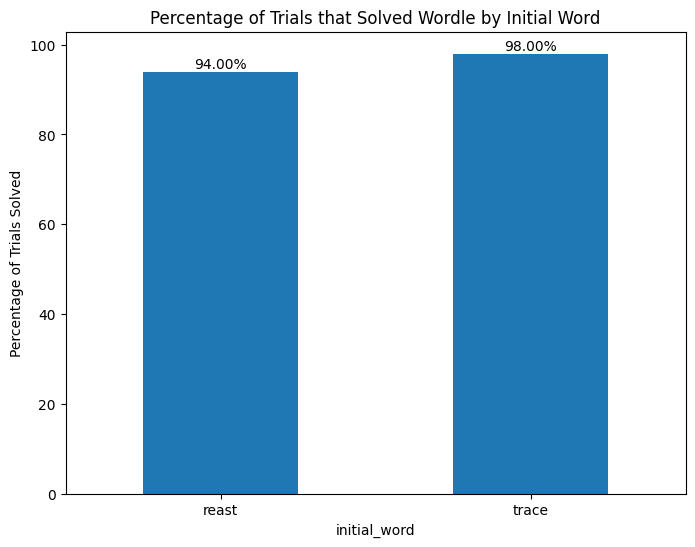

In [4]:
import matplotlib.pyplot as plt

# Group by solver and calculate the percentage of solved Wordle
solved_percentages = df.groupby('initial_word')['solved_wordle'].mean() * 100

# Plot
plt.figure(figsize=(8, 6))
bars = solved_percentages.plot(kind='bar')
plt.ylabel('Percentage of Trials Solved')
plt.title('Percentage of Trials that Solved Wordle by Initial Word')

# Add percentage labels on top of each bar
for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
              f'{bar.get_height():.2f}%', ha='center', va='bottom')

# Rotate x-axis labels
plt.xticks(rotation=0)
plt.savefig('../docs/images/percentage_solved_100_words_reast.png')
plt.show()

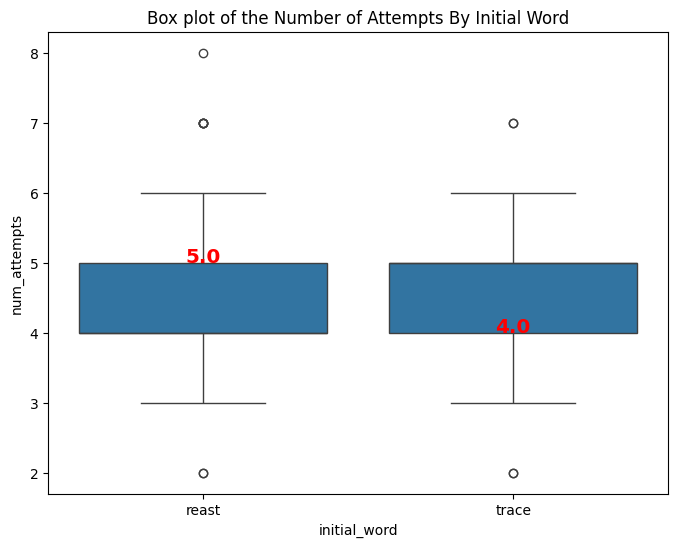

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(x='initial_word', y='num_attempts', data=df)

medians = df.groupby(['initial_word'])['num_attempts'].median().values
medians = medians[::-1] # reverse order to match the boxplot order
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,box_plot.get_xticklabels()):
    box_plot.text(pos[tick], medians[tick], median_labels[tick], 
            horizontalalignment='center', size='x-large', color='r', weight='semibold')

plt.title('Box plot of the Number of Attempts By Initial Word')
plt.savefig('../docs/images/boxplot_num_attempts_100_words_reast.png')
plt.show()

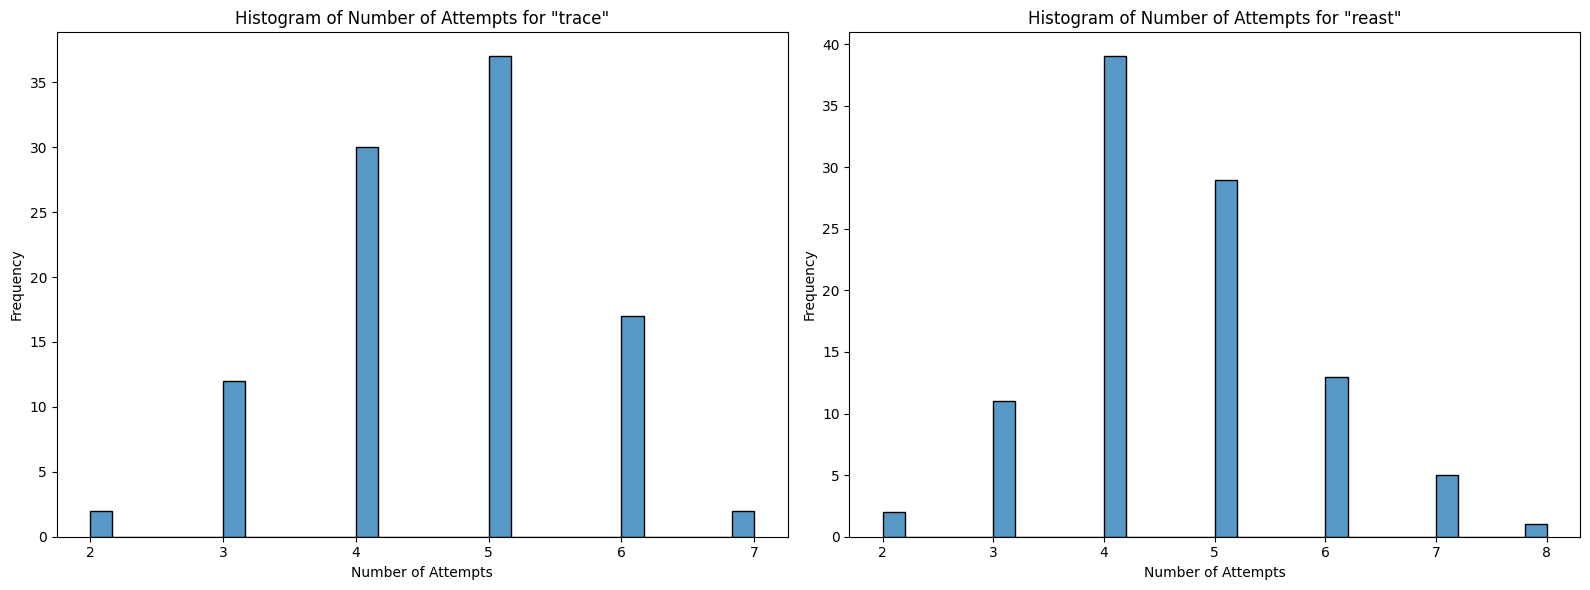

In [6]:
# Filter the DataFrame for the initial words "trace" and "reast"
trace_df = df[df['initial_word'] == 'trace']
reast_df = df[df['initial_word'] == 'reast']

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the histogram for "trace"
sns.histplot(trace_df['num_attempts'], bins=30, kde=False, ax=axs[0])
axs[0].set_title('Histogram of Number of Attempts for "trace"')
axs[0].set_xlabel('Number of Attempts')
axs[0].set_ylabel('Frequency')

# Plot the histogram for "reast"
sns.histplot(reast_df['num_attempts'], bins=30, kde=False, ax=axs[1])
axs[1].set_title('Histogram of Number of Attempts for "reast"')
axs[1].set_xlabel('Number of Attempts')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../docs/images/histogram_num_attempts_trace_reast.png')
plt.show()

In [7]:
df.groupby('initial_word')['num_attempts'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
initial_word,,,,,,,,,,,
reast,100.0,4.59,1.129002,2.0,4.0,4.0,5.0,6.0,7.0,7.01,8.0
trace,100.0,4.61,1.033724,2.0,4.0,5.0,5.0,6.0,6.0,7.00,7.0
